# Credit Card Fraud Detection (Naive Bayes and Logistic Regression)
### by Diptorshi Tripathi, VIT-AP University

In [1]:
# Importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [2]:
# Loading and combining datasets.
fraud_train = pd.read_csv('fraudTrain.csv')
fraud_test = pd.read_csv('fraudTest.csv')
fraud_data = pd.concat([fraud_train, fraud_test])

# Converting trans_date_trans_time to datetime, for ease.
fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'])

In [3]:
# Extracting relevant features from the datetime column.
fraud_data['hour'] = fraud_data['trans_date_trans_time'].dt.hour
fraud_data['day'] = fraud_data['trans_date_trans_time'].dt.day
fraud_data['month'] = fraud_data['trans_date_trans_time'].dt.month

# Dropping non numeric columns.
fraud_data = fraud_data.drop(['trans_date_trans_time', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)

# Extracting features and assigning.
X = fraud_data.drop('is_fraud', axis=1)
y = fraud_data['is_fraud']

# Converting categorical variables to numerical.
X = pd.get_dummies(X, columns=['category', 'gender'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Scaling features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Logistic Regression model.
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

lr_conf_matrix = confusion_matrix(y_test, lr_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Confusion Matrix:\n", lr_conf_matrix)
print("Classification Report:\n", classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 0.9943370609400263
Confusion Matrix:
 [[368381    145]
 [  1953      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



In [6]:
# Naive Bayes model.
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_predictions = nb_model.predict(X_test_scaled)

nb_conf_matrix = confusion_matrix(y_test, nb_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("\nNaive Bayes Accuracy:", nb_accuracy)
print("Confusion Matrix:\n", nb_conf_matrix)
print("Classification Report:\n", classification_report(y_test, nb_predictions))


Naive Bayes Accuracy: 0.9174879007986957
Confusion Matrix:
 [[338567  29959]
 [   610   1343]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96    368526
           1       0.04      0.69      0.08      1953

    accuracy                           0.92    370479
   macro avg       0.52      0.80      0.52    370479
weighted avg       0.99      0.92      0.95    370479



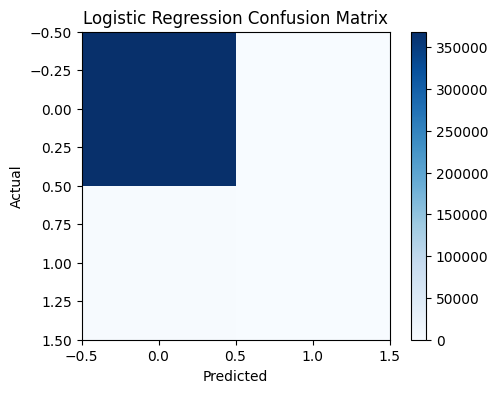

In [7]:
# Plotting confusion matrix for LR Model.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Logistic Regression Confusion Matrix")
plt.imshow(lr_conf_matrix, cmap='Blues', interpolation='None')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

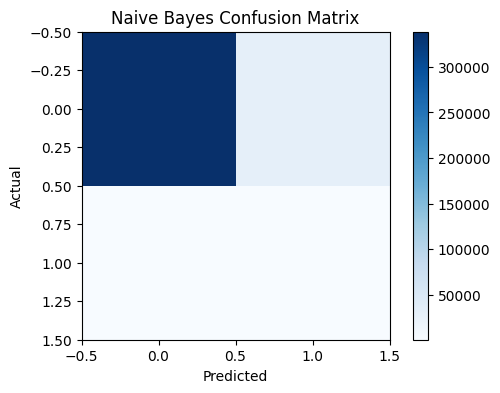

In [8]:
# Plotting confusion matrix for NB Model.
plt.figure(figsize=(6, 4))
plt.title("Naive Bayes Confusion Matrix")
plt.imshow(nb_conf_matrix, cmap='Blues', interpolation='None')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [9]:
# Calculating Receiver-operating characteristic curve for both models.
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)

In [10]:
nb_probs = nb_model.predict_proba(X_test_scaled)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
roc_auc_nb = auc(fpr_nb, tpr_nb)

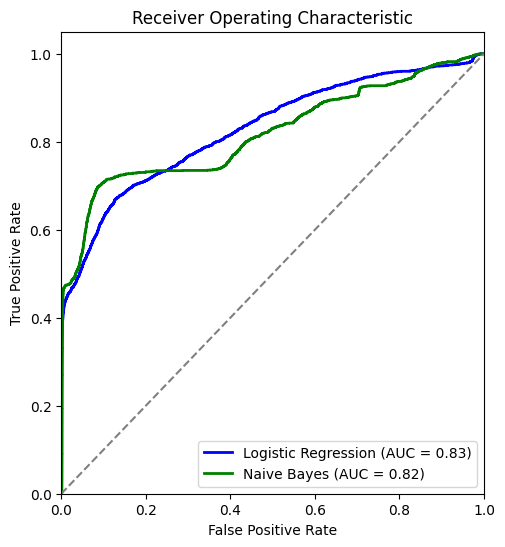

In [11]:
# Plotting ROC curve.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [12]:
# Calculating precision-recall curve for both models.
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_probs)
pr_auc_lr = auc(recall_lr, precision_lr)
precision_nb, recall_nb, _ = precision_recall_curve(y_test, nb_probs)
pr_auc_nb = auc(recall_nb, precision_nb)

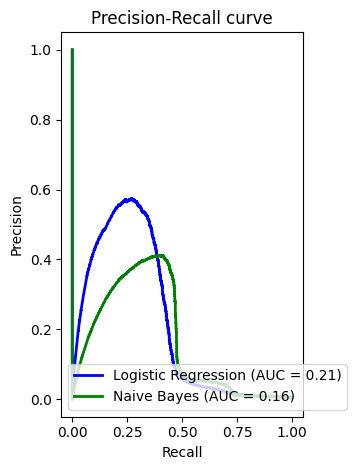

In [13]:
# Plotting PR curve.
plt.subplot(1, 2, 2)
plt.plot(recall_lr, precision_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % pr_auc_lr)
plt.plot(recall_nb, precision_nb, color='green', lw=2, label='Naive Bayes (AUC = %0.2f)' % pr_auc_nb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

In [14]:
# Preprocessing function.
def predict_fraud(transaction_data):
    transaction_data['trans_date_trans_time'] = pd.to_datetime(transaction_data['trans_date_trans_time'])
    transaction_data['hour'] = transaction_data['trans_date_trans_time'].dt.hour
    transaction_data['day'] = transaction_data['trans_date_trans_time'].dt.day
    transaction_data['month'] = transaction_data['trans_date_trans_time'].dt.month
    transaction_data = transaction_data.drop(['trans_date_trans_time', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)
    transaction_data = pd.get_dummies(transaction_data, columns=['category', 'gender'], drop_first=True)
    
    # Adjusting missing column data.
    missing_cols = set(X_train.columns) - set(transaction_data.columns)
    for col in missing_cols:
        transaction_data[col] = 0
    transaction_data = transaction_data[X_train.columns]
    
    transaction_data_scaled = scaler.transform(transaction_data)
    
    # Predicting, using both the invoked models.
    lr_prediction = lr_model.predict(transaction_data_scaled)
    nb_prediction = nb_model.predict(transaction_data_scaled)
    return lr_prediction, nb_prediction


In [15]:
# Testing it out.
new_transaction_data = pd.read_csv('sample1.csv') 
lr_prediction, nb_prediction = predict_fraud(new_transaction_data)
print("Logistic Regression Prediction:", lr_prediction)
print("Naive Bayes Prediction:", nb_prediction)


Logistic Regression Prediction: [0]
Naive Bayes Prediction: [1]


C:\Users\dipto\AppData\Local\Temp\ipykernel_24072\4103272695.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  transaction_data['trans_date_trans_time'] = pd.to_datetime(transaction_data['trans_date_trans_time'])


In [16]:
# Second sample.
new_transaction_data2 = pd.read_csv('sample2.csv')
lr_prediction, nb_prediction = predict_fraud(new_transaction_data2)
print("Logistic Regression Prediction:", lr_prediction)
print("Naive Bayes Prediction:", nb_prediction)


Logistic Regression Prediction: [0]
Naive Bayes Prediction: [1]


# Conclusion
It is seen that the Logistic Regression model provides a higher accuracy rate as compared to the Naive Bayes model, and when fed with sample data, both the trained models tend to give seperate values.